# cmip Compounds

In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
indexSets=['ecCombinedDmiSamsummer','ecCombinedDmiSamwinter']

In [5]:
compoundXr=xarray.open_dataset('results/cmip6Compounds.nc')

In [6]:
%run utils/emergence.ipynb

In [7]:
compoundCountsXr=compoundXr[[
    'ecCombinedDmiSamwinter','ecCombinedDmiSamsummer'
]].sel(compound='anyCompound', drop=True).rolling(
    year=30, center=True
).sum('year')

# Time of emergence plot

In [8]:
compoundXr

<xarray.Dataset>
Dimensions:                    (fire: 2, compound: 9, experiment: 2, model: 37, year: 5341)
Coordinates:
  * experiment                 (experiment) object 'piControl' 'ssp585'
  * year                       (year) int64 1 2 3 4 5 ... 7890 7891 7892 7893
  * model                      (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * compound                   (compound) object 'nEvents' ... 'anyCompound'
  * fire                       (fire) object 'pos' 'neg'
Data variables: (12/16)
    nino34EastioSamwinter      (fire, compound, experiment, model, year) float64 ...
    nino34EastioSamsummer      (fire, compound, experiment, model, year) float64 ...
    nino34DmiSamwinter         (fire, compound, experiment, model, year) float64 ...
    nino34DmiSamsummer         (fire, compound, experiment, model, year) float64 ...
    cIndexEastioSamwinter      (fire, compound, model, experiment, year) float64 ...
    cIndexEastioSamsummer      (fire, compound, model, experiment, year) float64 ...
    ...                         ...
    eIndexDmiSamwinter         (fire, compound, model, experiment, year) float64 ...
    eIndexDmiSamsummer         (fire, compound, model, experiment, year) float64 ...
    ecCombinedEastioSamwinter  (fire, compound, model, experiment, year) float64 ...
    ecCombinedEastioSamsummer  (fire, compound, model, experiment, year) float64 ...
    ecCombinedDmiSamwinter     (fire, compound, model, experiment, year) float64 ...
    ecCombinedDmiSamsummer     (fire, compound, model, experiment, year) float64 ...
Attributes:
    indexNames:  ['nino3', 'eastIO', 'samSummer']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

In [11]:
compoundXr.isel(model=-4).ecCombinedDmiSamsummer.sel(compound='anyCompound')

<xarray.DataArray 'ecCombinedDmiSamsummer' (fire: 2, experiment: 2, year: 5341)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * experiment  (experiment) object 'piControl' 'ssp585'
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
    model       <U5 'NESM3'
    compound    <U11 'anyCompound'
  * fire        (fire) object 'pos' 'neg'
Attributes:
    indexNames:  ['ecCombined', 'dmi', 'samSummer']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

# Plot time of emergence by model

In [19]:
compoundCountsXr.sel(model=iModel, experiment='piControl',fire='pos', drop=True).mean()

<xarray.Dataset>
Dimensions:                 ()
Data variables:
    ecCombinedDmiSamwinter  float64 4.311
    ecCombinedDmiSamsummer  float64 4.874

In [20]:
compoundCountsXr.sel(model=iModel, experiment='piControl',fire='pos', drop=True).std('year')

<xarray.Dataset>
Dimensions:                 ()
Data variables:
    ecCombinedDmiSamwinter  float64 1.695
    ecCombinedDmiSamsummer  float64 1.909

ACCESS-CM2


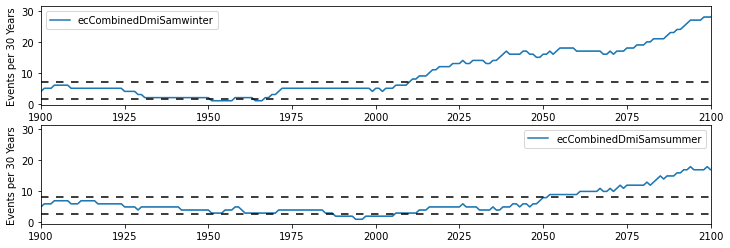

ACCESS-ESM1-5


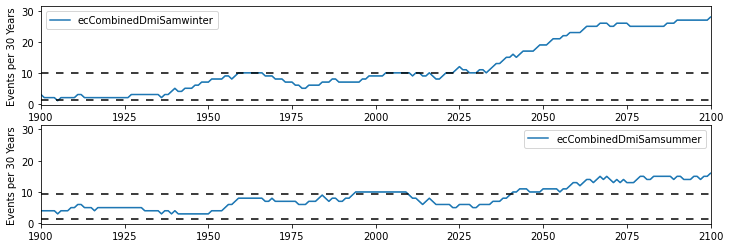

AWI-CM-1-1-MR


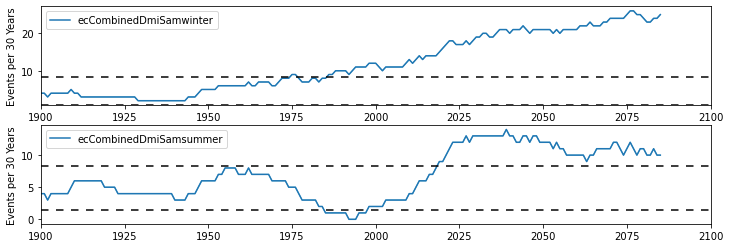

BCC-CSM2-MR


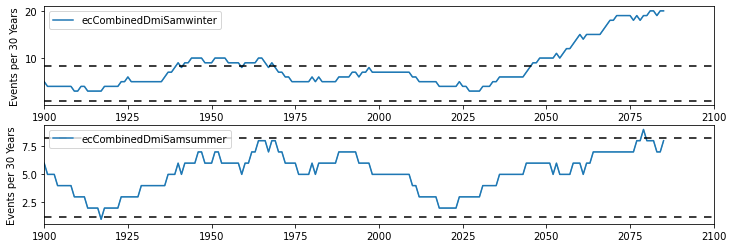

CAMS-CSM1-0


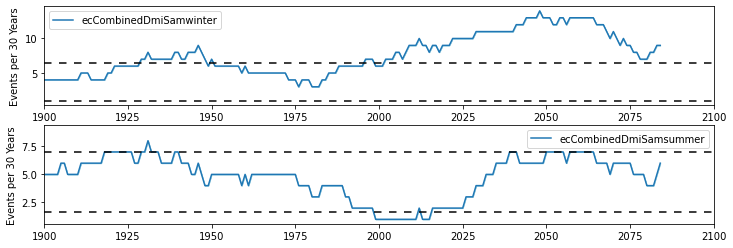

CAS-ESM2-0


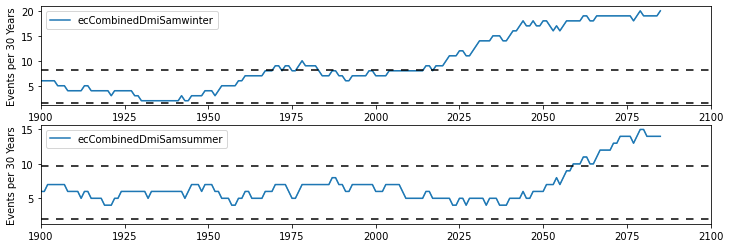

CESM2


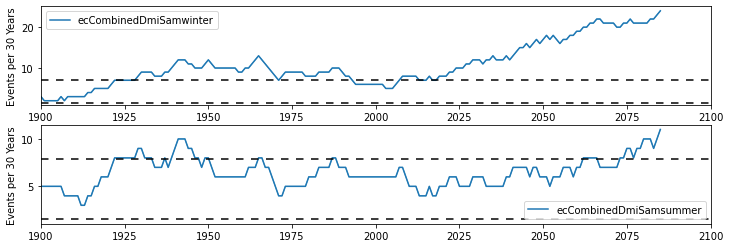

CESM2-WACCM


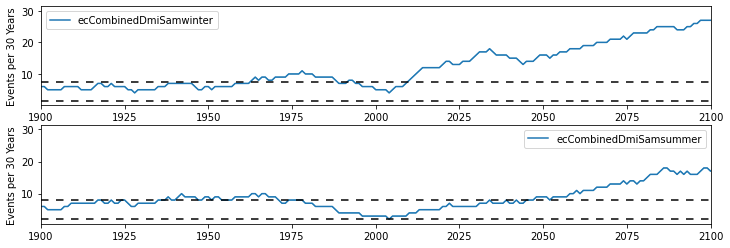

CIESM


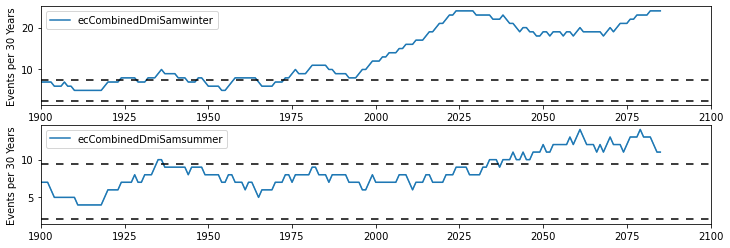

CMCC-CM2-SR5


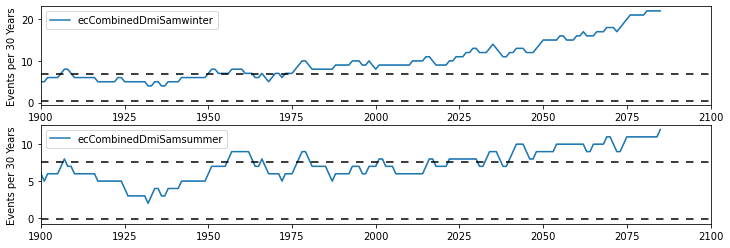

CMCC-ESM2


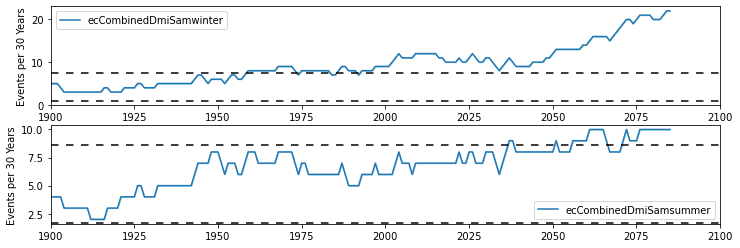

CNRM-CM6-1


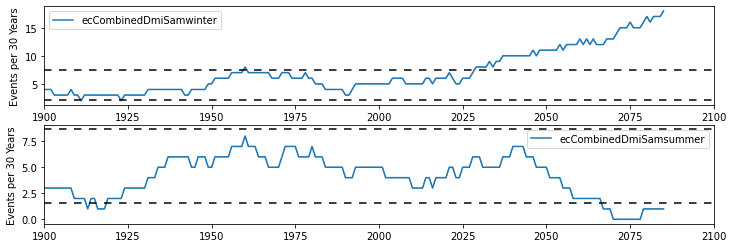

CNRM-ESM2-1


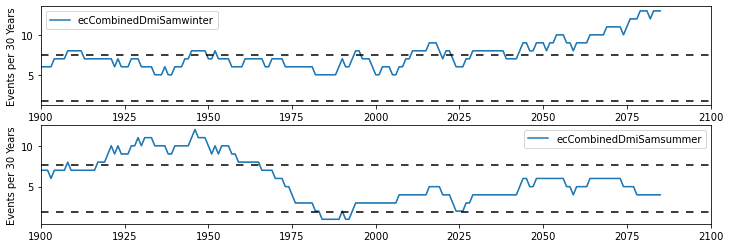

CanESM5


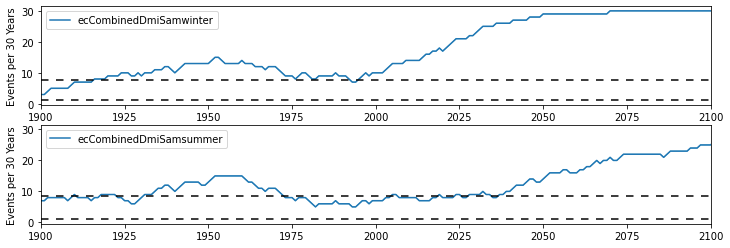

CanESM5-CanOE


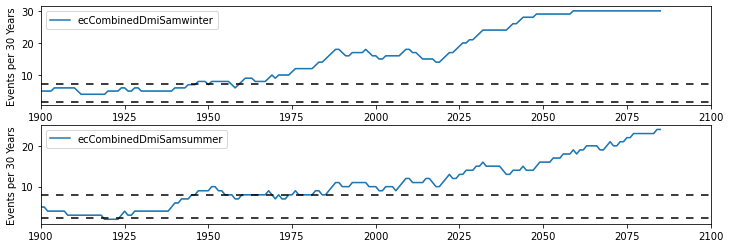

EC-Earth3


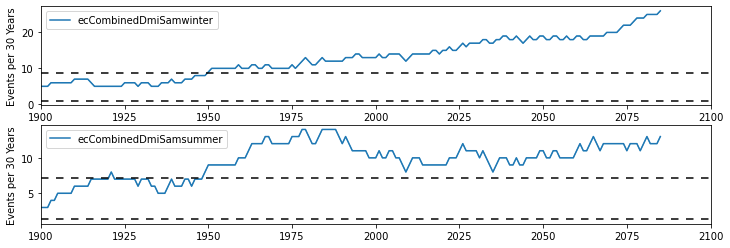

EC-Earth3-CC


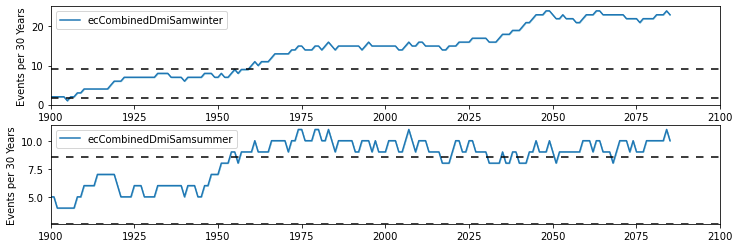

EC-Earth3-Veg


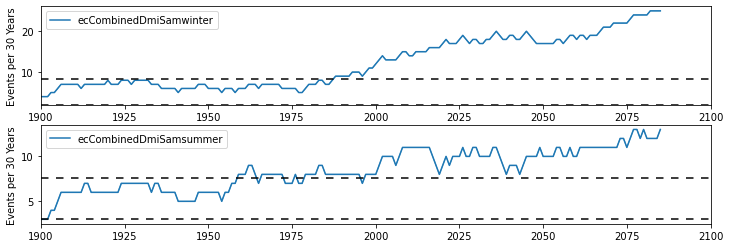

EC-Earth3-Veg-LR


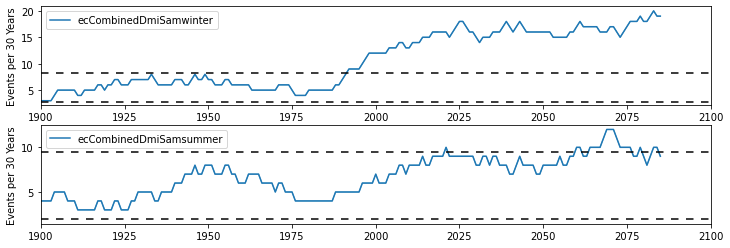

GFDL-CM4


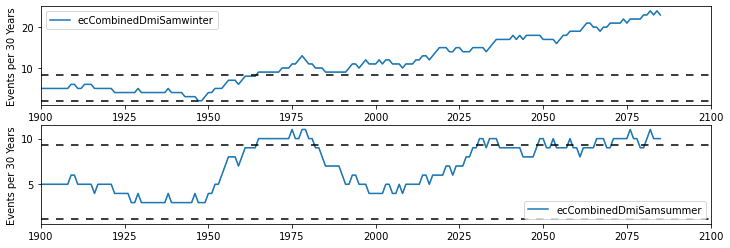

GFDL-ESM4


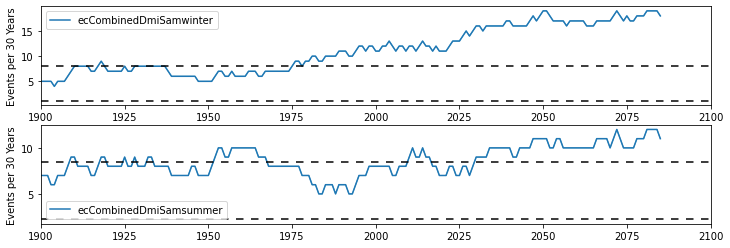

GISS-E2-1-G


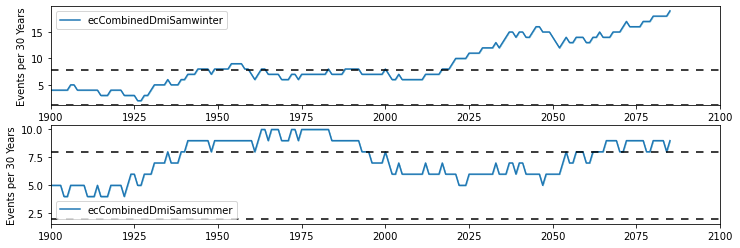

HadGEM3-GC31-LL


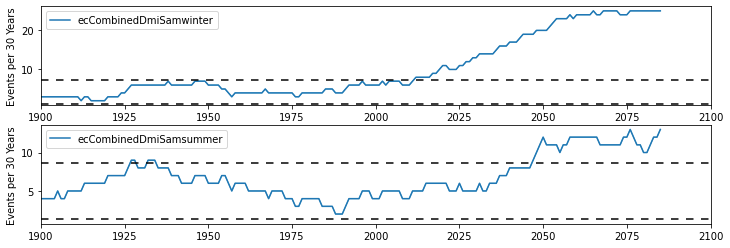

HadGEM3-GC31-MM


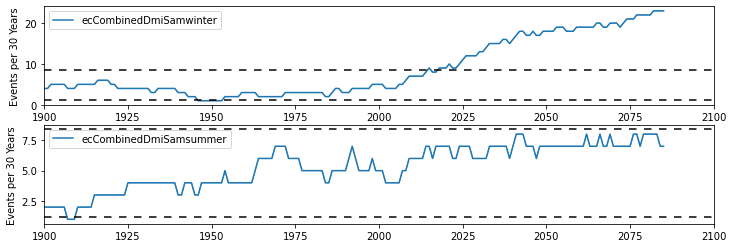

INM-CM4-8


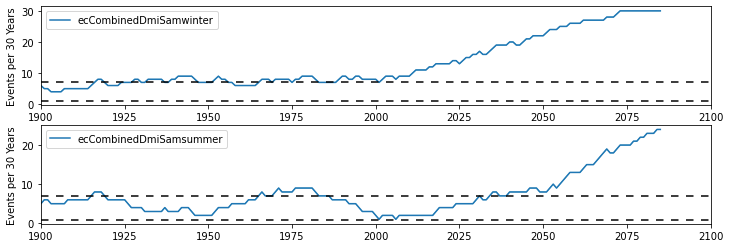

INM-CM5-0


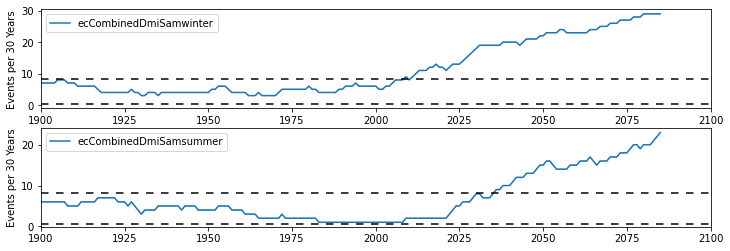

IPSL-CM6A-LR


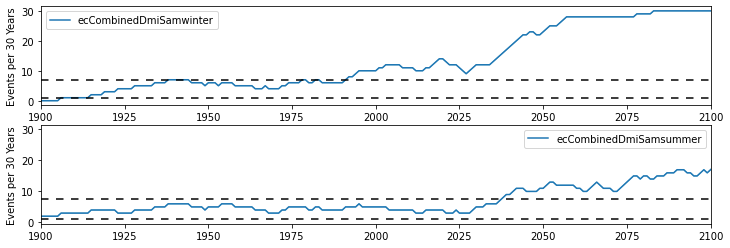

MCM-UA-1-0


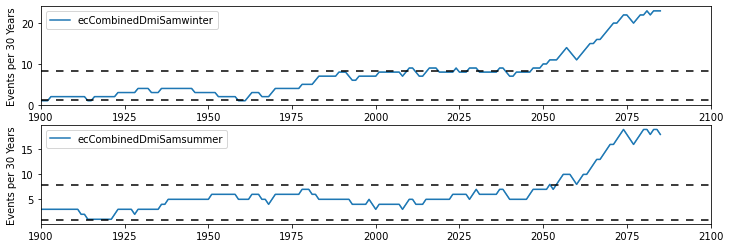

MIROC-ES2L


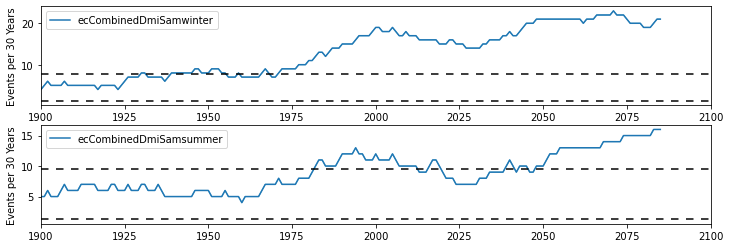

MIROC6


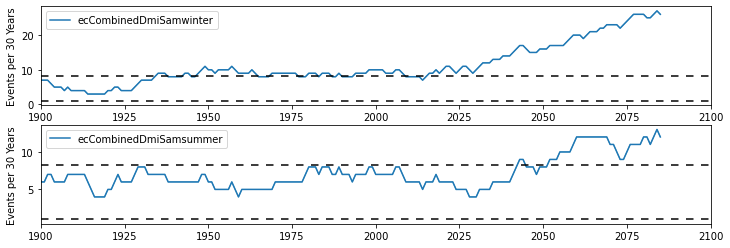

MPI-ESM1-2-HR


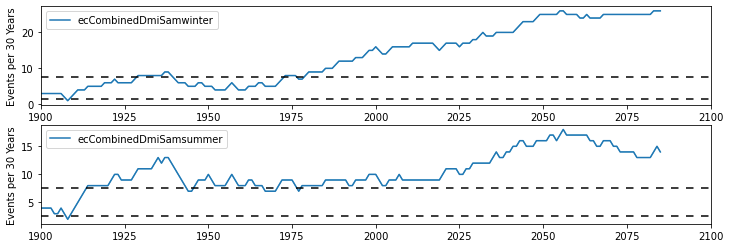

MPI-ESM1-2-LR


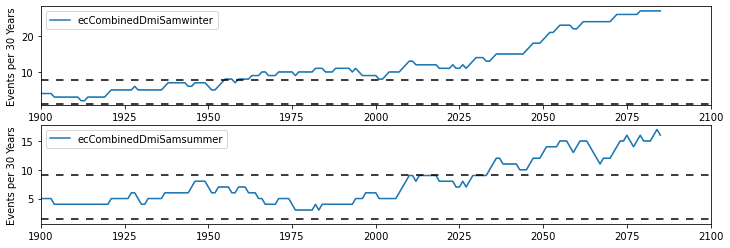

MRI-ESM2-0


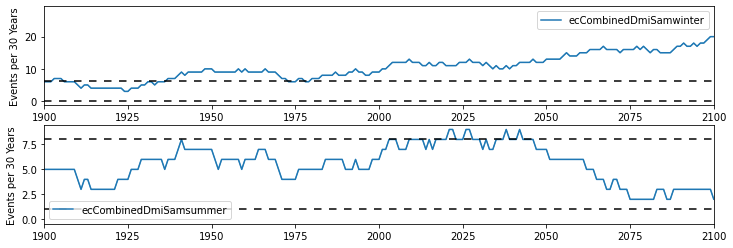

NESM3


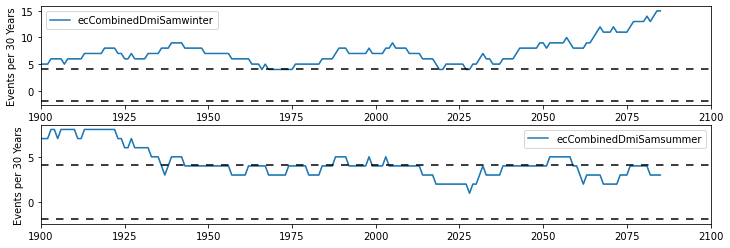

NorESM2-LM


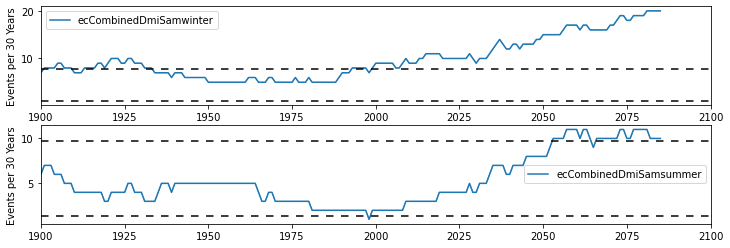

NorESM2-MM


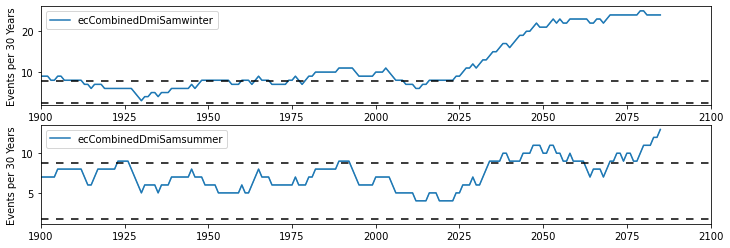

UKESM1-0-LL


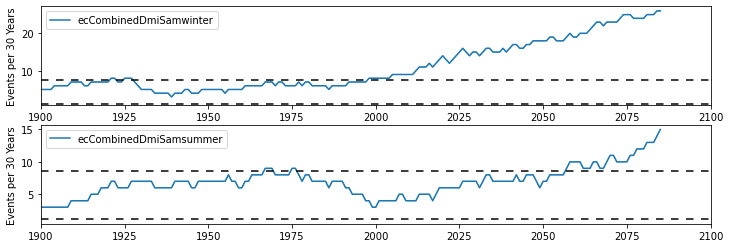

In [22]:
for iModel in compoundCountsXr.model.values:
    print(iModel)
    ax=modelEmergePlot(
        compoundCountsXr.sel(model=iModel, experiment='ssp585',fire='pos', drop=True),
        compoundCountsXr.sel(model=iModel, experiment='piControl',fire='pos', drop=True)
    )

    plt.show()

ACCESS-CM2


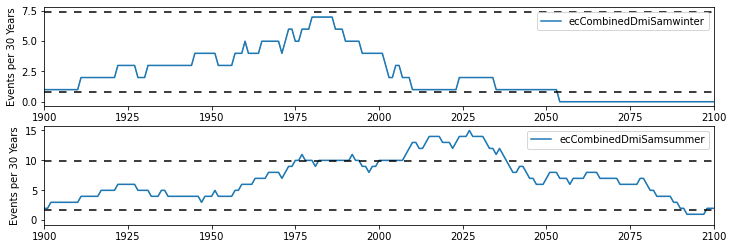

ACCESS-ESM1-5


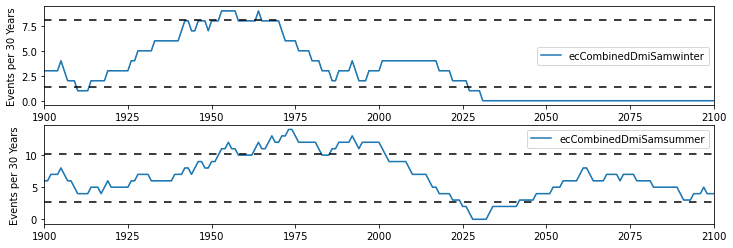

AWI-CM-1-1-MR


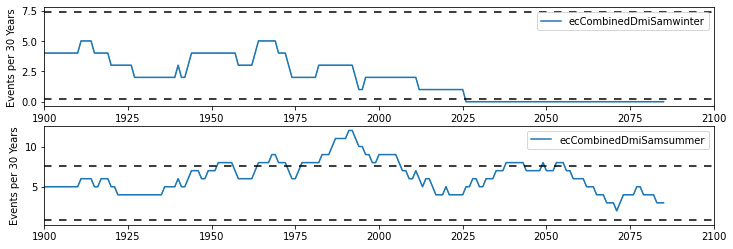

BCC-CSM2-MR


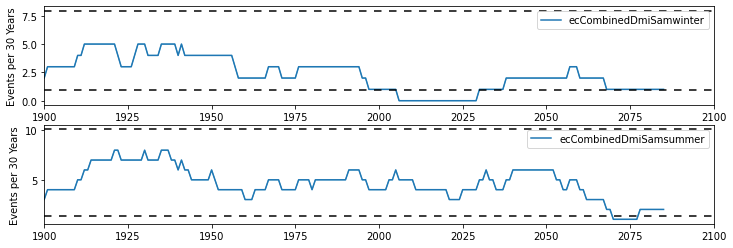

CAMS-CSM1-0


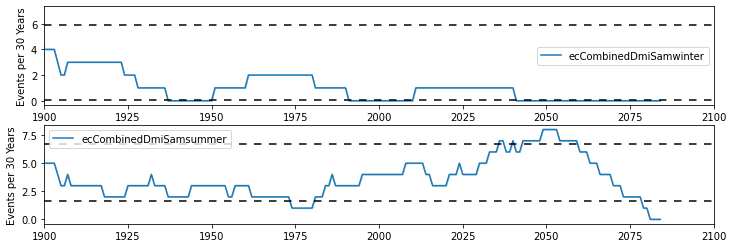

CAS-ESM2-0


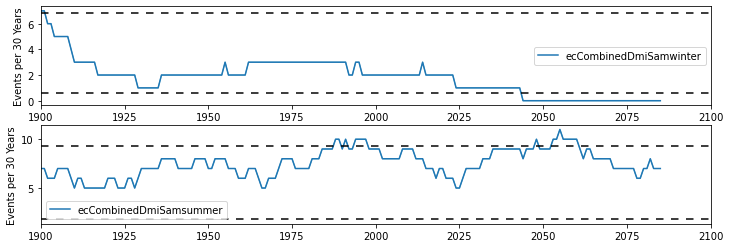

CESM2


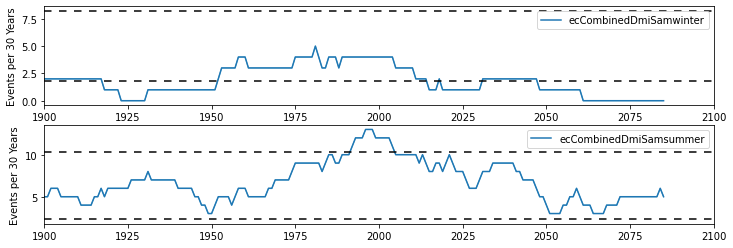

CESM2-WACCM


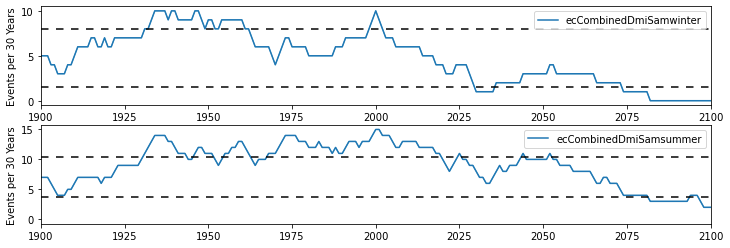

CIESM


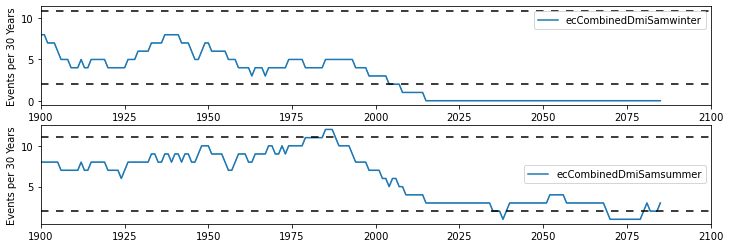

CMCC-CM2-SR5


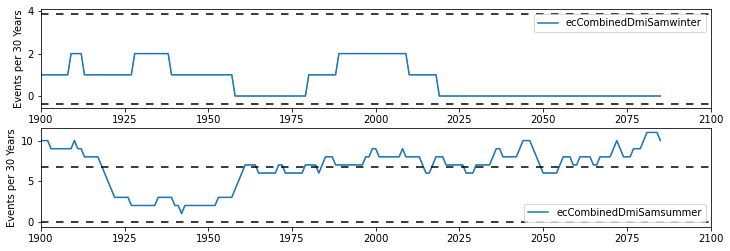

CMCC-ESM2


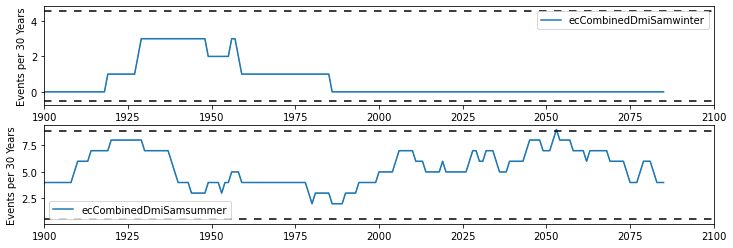

CNRM-CM6-1


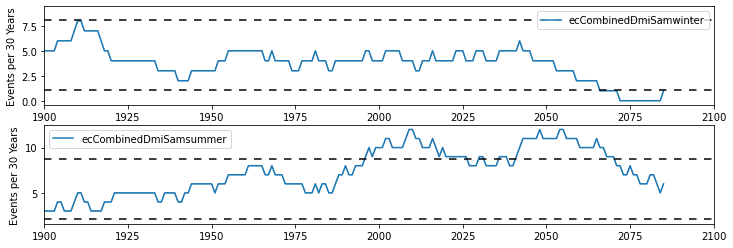

CNRM-ESM2-1


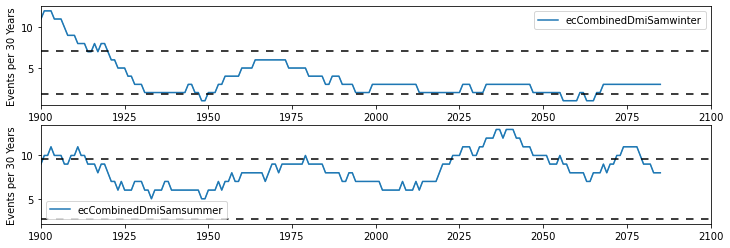

CanESM5


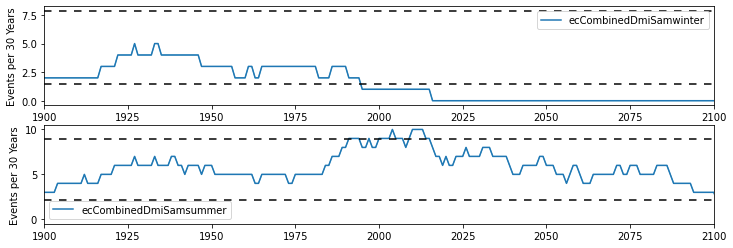

CanESM5-CanOE


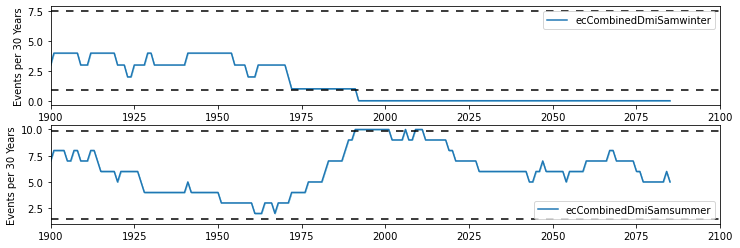

EC-Earth3


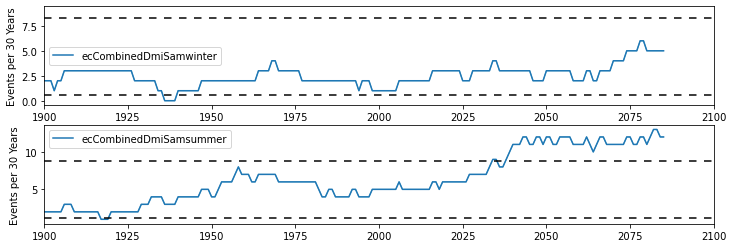

EC-Earth3-CC


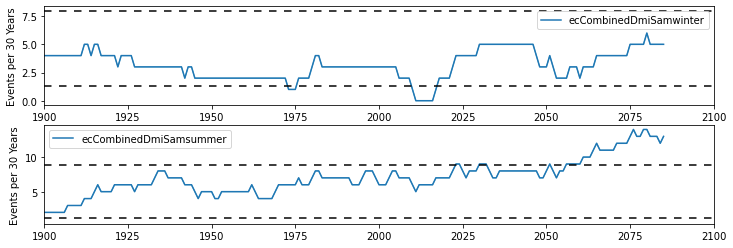

EC-Earth3-Veg


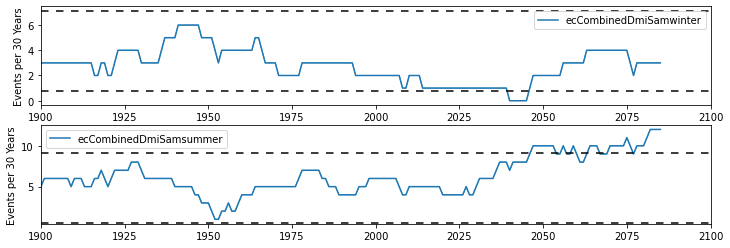

EC-Earth3-Veg-LR


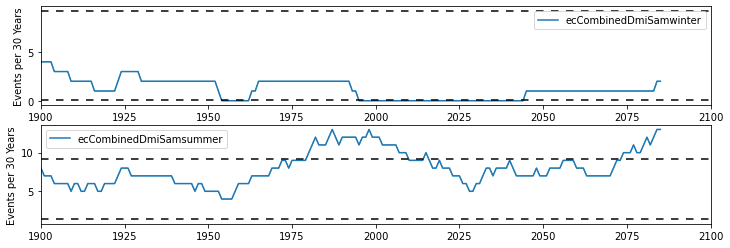

GFDL-CM4


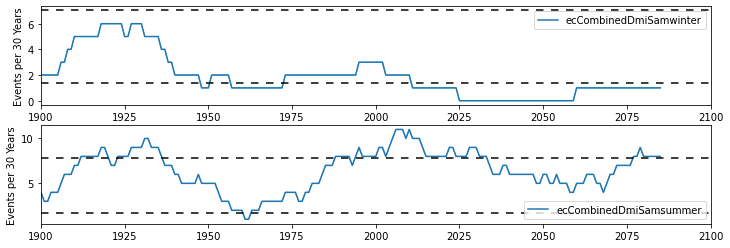

GFDL-ESM4


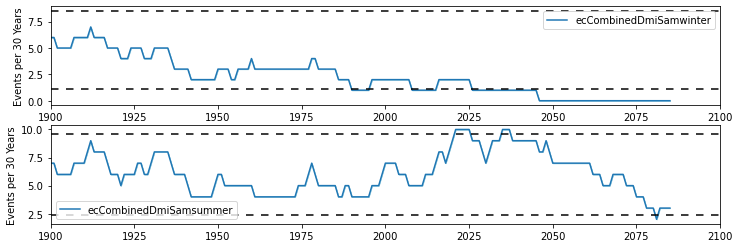

GISS-E2-1-G


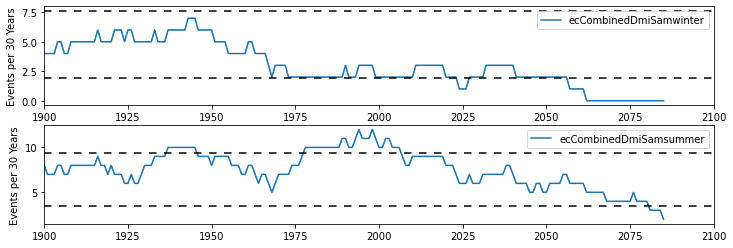

HadGEM3-GC31-LL


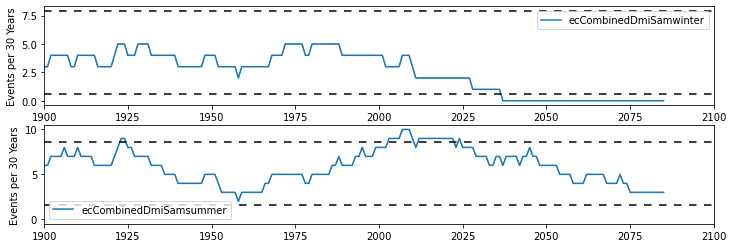

HadGEM3-GC31-MM


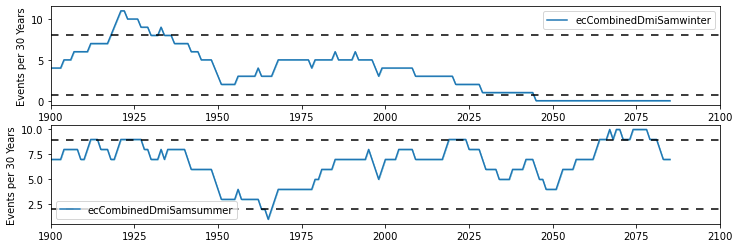

INM-CM4-8


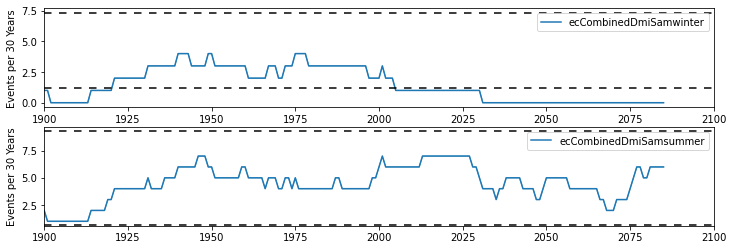

INM-CM5-0


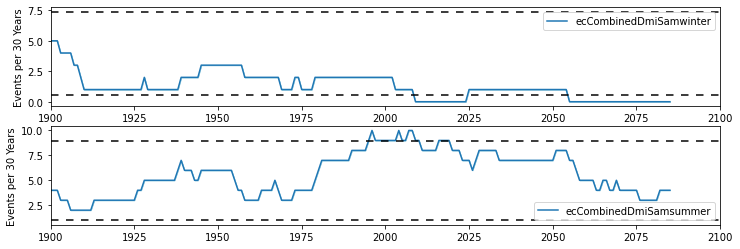

IPSL-CM6A-LR


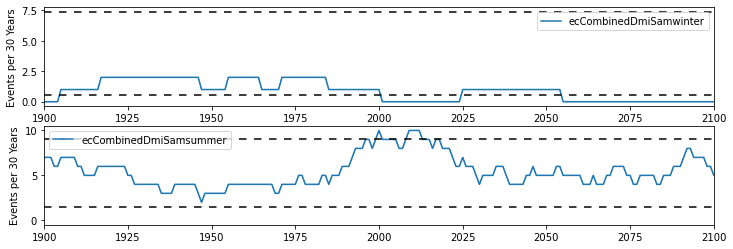

MCM-UA-1-0


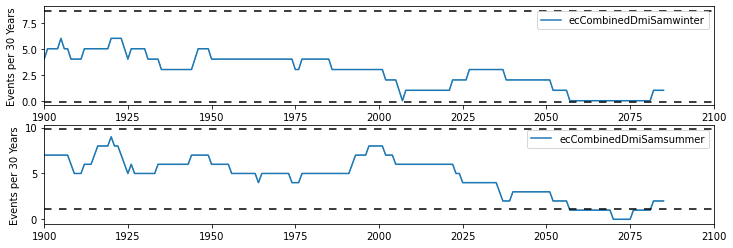

MIROC-ES2L


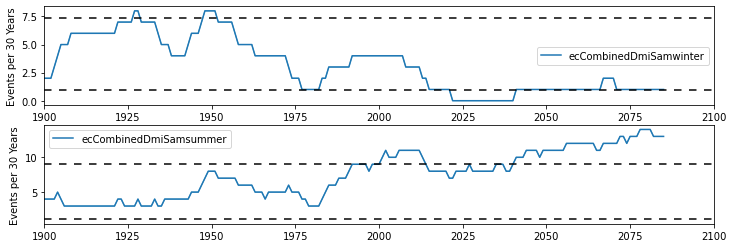

MIROC6


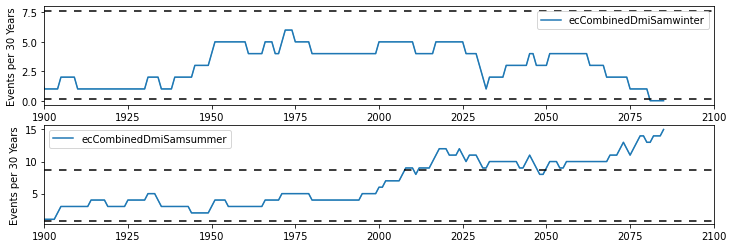

MPI-ESM1-2-HR


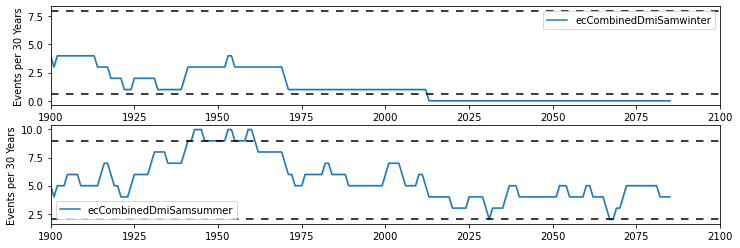

MPI-ESM1-2-LR


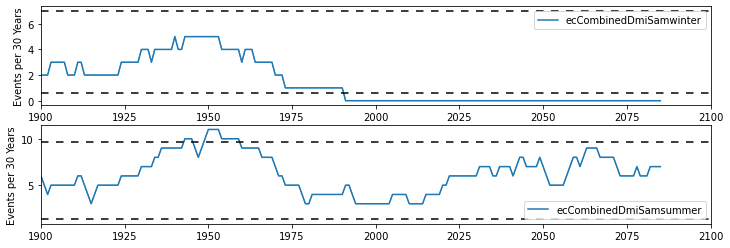

MRI-ESM2-0


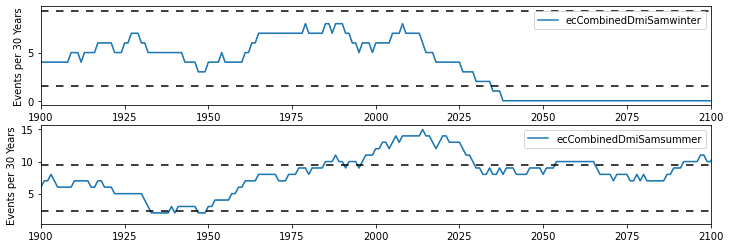

NESM3


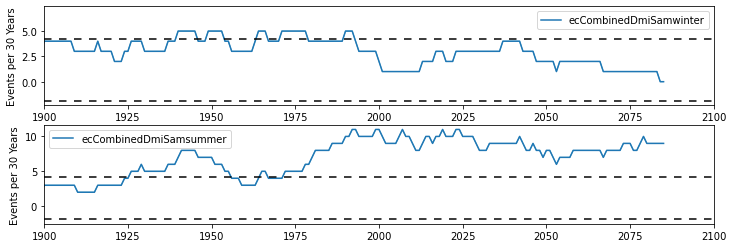

NorESM2-LM


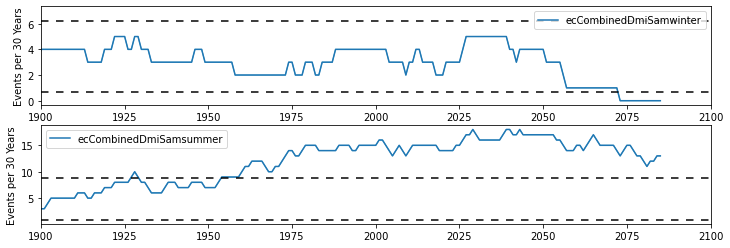

NorESM2-MM


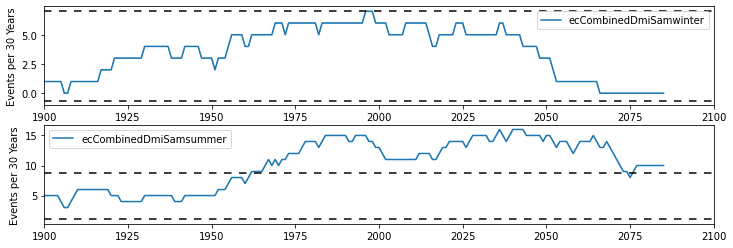

UKESM1-0-LL


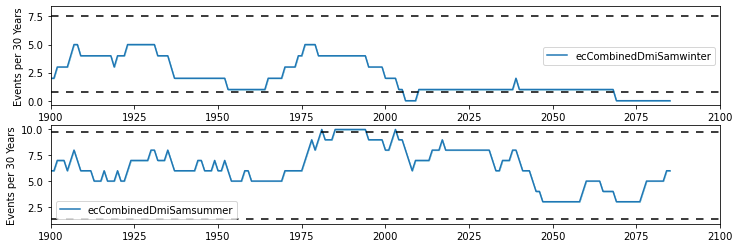

In [23]:
for iModel in compoundCountsXr.model.values:
    print(iModel)
    ax=modelEmergePlot(
        compoundCountsXr.sel(model=iModel, experiment='ssp585',fire='neg', drop=True),
        compoundCountsXr.sel(model=iModel, experiment='piControl',fire='neg', drop=True)
    )

    plt.show()